In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [49]:
test = pd.read_csv('../data/test.csv', dtype={'ID': 'int32', 'shop_id': 'int32', 
                                                  'item_id': 'int32'})
item_categories = pd.read_csv('../data/item_categories.csv', 
                              dtype={'item_category_name': 'str', 'item_category_id': 'int32'})
items = pd.read_csv('../data/items.csv', dtype={'item_name': 'str', 'item_id': 'int32', 
                                                 'item_category_id': 'int32'})
shops = pd.read_csv('../data/shops.csv', dtype={'shop_name': 'str', 'shop_id': 'int32'})
sales = pd.read_csv('../data/sales_train.csv', parse_dates=['date'], 
                    dtype={'date': 'str', 'date_block_num': 'int32', 'shop_id': 'int32', 
                          'item_id': 'int32', 'item_price': 'float32', 'item_cnt_day': 'int32'})

In [50]:
train = sales.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(item_categories, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)

In [51]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.000000,1,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.000000,1,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-05-01,0,25,2552,899.000000,-1,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.050049,1,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.000000,1,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [52]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.906234e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.726440e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [53]:
train[train['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
484683,2013-05-15,4,32,2973,-1.0,1,"DmC Devil May Cry [PS3, русские субтитры]",19,"Москва ТЦ ""Серебряный Дом""",Игры - PS3


In [54]:
print('Min date from train set: %s' % train['date'].min().date())
print('Max date from train set: %s' % train['date'].max().date())

Min date from train set: 2013-01-01
Max date from train set: 2015-12-10


In [55]:
train = train[train['item_price'] > 0]

In [56]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [57]:
test_shop_ids = test['shop_id'].unique()
test_item_ids = test['item_id'].unique()

In [58]:
lk_train = train[train['shop_id'].isin(test_shop_ids)]

lk_train = lk_train[lk_train['item_id'].isin(test_item_ids)]

In [59]:
np.all(lk_train['item_id'].isin(test_item_ids).values)

True

In [60]:
print('Data set size before leaking:', train.shape[0])
print('Data set size after leaking:', lk_train.shape[0])

Data set size before leaking: 2935848
Data set size after leaking: 1224439


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935848 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int32         
 2   shop_id             int32         
 3   item_id             int32         
 4   item_price          float32       
 5   item_cnt_day        int32         
 6   item_name           object        
 7   item_category_id    int32         
 8   shop_name           object        
 9   item_category_name  object        
dtypes: datetime64[ns](1), float32(1), int32(5), object(3)
memory usage: 179.2+ MB


In [62]:
train_monthly = lk_train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]

In [63]:
train_monthly.head()

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,37,22154,999.0,1
10,2013-03-01,0,25,55,2574,399.0,2
11,2013-05-01,0,25,55,2574,399.0,1
12,2013-07-01,0,25,55,2574,399.0,1
13,2013-08-01,0,25,55,2574,399.0,2


In [64]:
train_monthly = train_monthly.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)
train_monthly = train_monthly.agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean','count']})
train_monthly.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions']

In [65]:
train_monthly.head()

,date_block_num,shop_id,item_category_id,item_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions
0,0,2,2,5572,10730.000000,1532.857178,9,1.285714,7
1,0,2,2,5643,4775.209961,2387.604980,0,0.000000,2
2,0,2,5,5583,1188.300049,594.150024,2,1.000000,2
3,0,2,6,7893,5970.000000,1990.000000,3,1.000000,3
4,0,2,6,7894,1490.000000,1490.000000,1,1.000000,1


In [66]:
train_monthly.isna().sum()

date_block_num      0
shop_id             0
item_category_id    0
item_id             0
item_price          0
mean_item_price     0
item_cnt            0
mean_item_cnt       0
transactions        0
dtype: int64

In [67]:
train_monthly['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [68]:
train_monthly[train_monthly['date_block_num'] == 32].mean()

date_block_num         32.000000
shop_id                31.975573
item_category_id       41.509118
item_id             10234.112206
item_price           2072.823975
mean_item_price      1095.895142
item_cnt                2.220863
mean_item_cnt           1.096099
transactions            1.737569
dtype: float64

In [69]:
train_monthly[train_monthly['date_block_num'] == 33].mean()

date_block_num         33.000000
shop_id                31.995223
item_category_id       42.307183
item_id             10701.266213
item_price           2130.701660
mean_item_price      1182.908203
item_cnt                2.191388
mean_item_cnt           1.087447
transactions            1.727057
dtype: float64

In [70]:
shop_ids = train_monthly['shop_id'].unique()
item_ids = train_monthly['item_id'].unique()

empty_df = []
for i in range(34): # upto 33
    for shop in shop_ids:
        for item in item_ids:
            empty_df.append([i, shop, item])
    
empty_df = pd.DataFrame(empty_df, columns=['date_block_num','shop_id','item_id'])

In [73]:
train_monthly = pd.merge(empty_df, train_monthly, on=['date_block_num','shop_id','item_id'], how='left')
train_monthly.fillna(0, inplace=True)

In [74]:
train_monthly.head()

,date_block_num,shop_id,item_id,item_category_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions
0,0,2,5572,2.0,10730.000000,1532.857178,9.0,1.285714,7.0
1,0,2,5643,2.0,4775.209961,2387.604980,0.0,0.000000,2.0
2,0,2,5583,5.0,1188.300049,594.150024,2.0,1.000000,2.0
3,0,2,7893,6.0,5970.000000,1990.000000,3.0,1.000000,3.0
4,0,2,7894,6.0,1490.000000,1490.000000,1.0,1.000000,1.0


In [75]:
train_monthly['year'] = train_monthly['date_block_num'].apply(lambda x: ((x//12) + 2013))
train_monthly['month'] = train_monthly['date_block_num'].apply(lambda x: (x % 12))

In [90]:
## item sale's mean and total
gp_month_mean = train_monthly[train_monthly['year']==2013].groupby(['month'], as_index=False)['item_cnt'].mean()
gp_month_sum = train_monthly[train_monthly['year']==2013].groupby(['month'], as_index=False)['item_cnt'].sum()

## item categories' mean and total
gp_category_mean = train_monthly.groupby(['item_category_id'], as_index=False)['item_cnt'].mean()
gp_category_sum = train_monthly.groupby(['item_category_id'], as_index=False)['item_cnt'].sum()

## item shop_id's mean and total
gp_shop_mean = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].mean()
gp_shop_sum = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].sum()

In [79]:
import matplotlib.pyplot as plt

In [89]:
train_monthly['year'].unique()

array([2013, 2014, 2015], dtype=int64)

In [95]:
gp_month_sum.head()

,month,item_cnt
0,0,20612.0
1,1,22163.0
2,2,31599.0
3,3,20704.0
4,4,23322.0


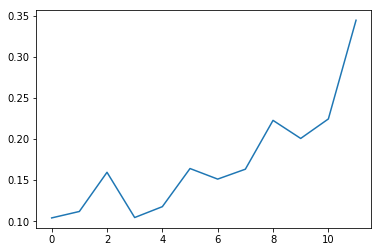

In [92]:
plt.plot(gp_month_mean['month'].values, gp_month_mean['item_cnt'].values)
plt.show()

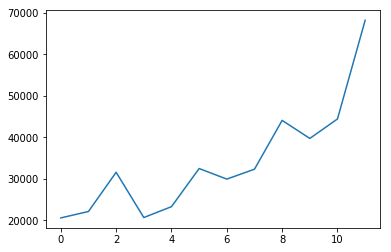

In [93]:
plt.plot(gp_month_sum['month'].values, gp_month_sum['item_cnt'].values)
plt.show()

C:\Users\ACER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


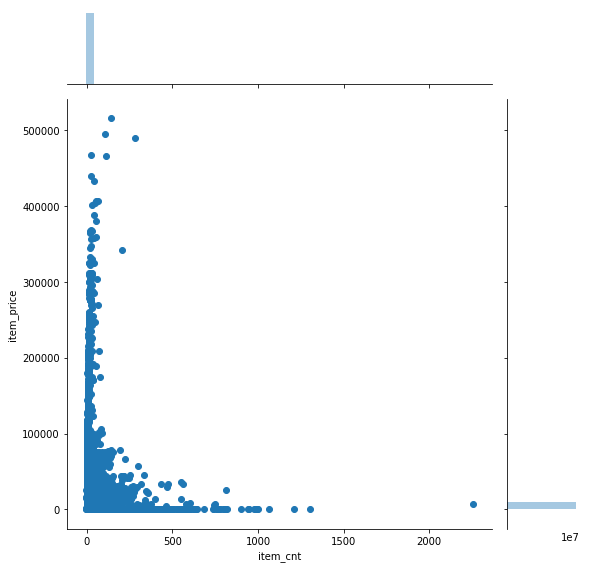

In [99]:
sns.jointplot(x="item_cnt", y="item_price", data=train_monthly, height=8)
plt.show()

C:\Users\ACER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


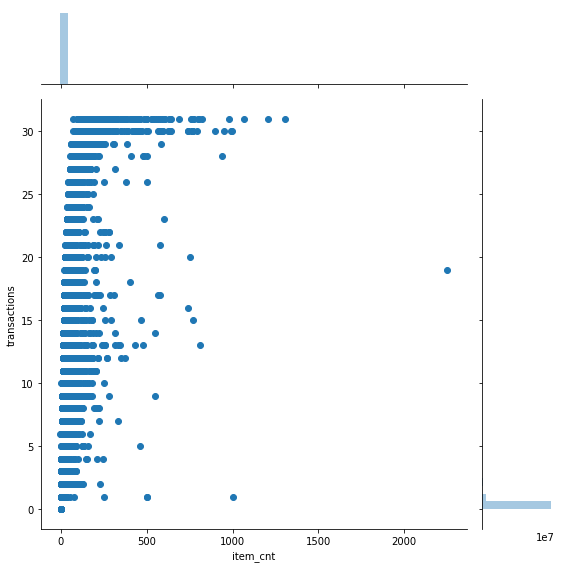

In [100]:
sns.jointplot(x="item_cnt", y="transactions", data=train_monthly, height=8)
plt.show()

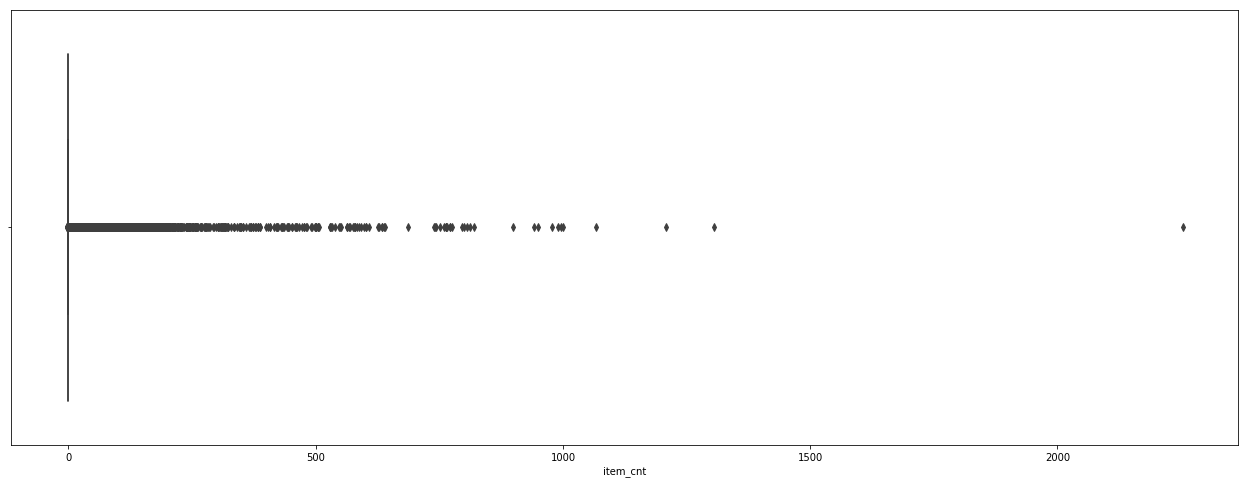

In [101]:
plt.subplots(figsize=(22, 8))
sns.boxplot(train_monthly['item_cnt'])
plt.show()

In [102]:
train_monthly['item_cnt'] = train_monthly.query('item_cnt < 1500')